In [9]:
import numpy as np
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Utility functions
def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [3]:
# Loads and prepares data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

validation_data = train_data[:1000]
train_data = train_data[1000:]

one_hot_train_labels = to_categorical(train_labels)
one_hot_validation_labels = one_hot_train_labels[:1000]
one_hot_train_labels = one_hot_train_labels[1000:]

one_hot_test_labels = to_categorical(test_labels)

In [4]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Trains model
history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=20, validation_data=(validation_data, one_hot_validation_labels))


Epoch 1/20
16/16 [==============================] - 1s 87ms/step - loss: 2.7782 - accuracy: 0.4503 - val_loss: 1.8769 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.4976 - accuracy: 0.6939 - val_loss: 1.3411 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 71ms/step - loss: 1.0751 - accuracy: 0.7671 - val_loss: 1.1496 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.8459 - accuracy: 0.8190 - val_loss: 1.0575 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 81ms/step - loss: 0.6814 - accuracy: 0.8557 - val_loss: 0.9812 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.5471 - accuracy: 0.8849 - val_loss: 0.9289 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4452 - accuracy: 0.9073 - val_loss: 0.9132 - val_accuracy: 0.8210
Epoch 8/20
16

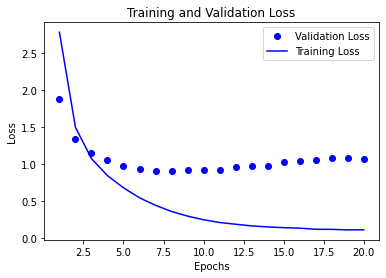

In [10]:
# Evaluates training and validation performance
history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)
validation_losses = history_dict["val_loss"]
training_losses = history_dict["loss"]

plt.plot(epochs, validation_losses, "bo", label="Validation Loss")
plt.plot(epochs, training_losses, "b", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

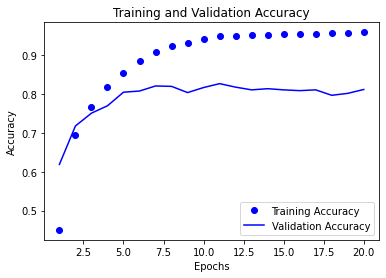

In [11]:
training_accuracies = history_dict["accuracy"]
validation_accuracies = history_dict["val_accuracy"]
plt.clf()
plt.plot(epochs, training_accuracies, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracies, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

71/71 [==============================] - 1s 19ms/step - loss: 1.2025 - accuracy: 0.7912
Model Performance on Test Data: Loss is  1.2025026082992554  and accuracy is  0.7911843061447144


In [13]:
# Performs predictions
predictions = model.predict(test_data)

In [20]:
# Checks if the dimension is same as that of number of topics i.e. 46
predictions[0].shape

(46,)

In [17]:
## To check predicted probability distributions for all topics for 0th newswire are summed up to 1
np.sum(predictions[0])

0.99999994

In [18]:
# Gets the ID of topic that has highest predicted probability
np.argmax(predictions[0])

3